# **Setup**

* https://www.kaggle.com/datasets/danielbacioiu/tig-aluminium-5083
* https://www.kaggle.com/code/mayankgupta1609/model-1

In [1]:
import pandas as pd 
import numpy as np 
from IPython.display import clear_output

import os
import shutil
import pickle

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Image Processing
import PIL

# Machine Learning 
import tensorflow as tf
import keras

In [2]:
Folder_Input = "C:\\Data Analytics Workspace\\Datasets\\01 Aluminium TIG Welding"
Folder_Train = f'{Folder_Input}/train'
Folder_Test = f'{Folder_Input}/test'
# Folder_Input = 'Input Data'
Folder_Output = 'Output Data'

Folder_List = [Folder_Input, Folder_Output]

# Create Folders
for folder in Folder_List:
    if not os.path.exists(folder):
        os.makedirs(folder, exist_ok=True)
        print(f'Created {folder}')

In [3]:
Folder_Main = os.getcwd()
print(Folder_Main)

c:\Users\aksha\OneDrive\06 Data Science & Analytics\Github\Machine-Vision\010 Aluminium 5083 Welding Defects


# **Data Import**

## **Download Data**

In [4]:
os.chdir(Folder_Input)
!kaggle datasets download -d danielbacioiu/tig-aluminium-5083 --quiet

os.chdir(Folder_Main)

In [5]:
os.getcwd()

'c:\\Users\\aksha\\OneDrive\\06 Data Science & Analytics\\Github\\Machine-Vision\\010 Aluminium 5083 Welding Defects'

In [6]:
os.listdir(Folder_Input)

['README', 'test', 'tig-aluminium-5083.zip', 'train']

## **Extract File**

In [7]:
def Extract_Zip(Zip_Filepath, Destination_Path,remove_zip=False):
    from zipfile import ZipFile
    with ZipFile(Zip_Filepath, 'r') as zip:
        print(zip.namelist())
        zip.extractall(Destination_Path)
        zip.close()
    if remove_zip:
            os.remove(Zip_Filepath)

In [8]:
os.listdir(Folder_Input)

['README', 'test', 'tig-aluminium-5083.zip', 'train']

In [9]:
Extract_Zip(Zip_Filepath=f'{Folder_Input}/tig-aluminium-5083.zip',
            Destination_Path=f'{Folder_Input}',remove_zip=False)

['al5083/README', 'al5083/al5083/README', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00322.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00323.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00324.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00325.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00326.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00327.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00328.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00329.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00330.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00331.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00332.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00333.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00334.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/frame_00335.png', 'al5083/al5083/test/170904-150144-Al 2mm-part2/f

## **Move Contents**

In [10]:
def move_folder_contents(source_folder, destination_folder):
    try:
        # Ensure the destination folder exists
        if not os.path.exists(destination_folder):
            os.makedirs(destination_folder)

        # Get a list of files and subdirectories in the source folder
        contents = os.listdir(source_folder)

        # Move each item to the destination folder
        for item in contents:
            source_path = os.path.join(source_folder, item)
            destination_path = os.path.join(destination_folder, item)
            # if os.path.isdir(source_path):
            shutil.move(source_path, destination_path)
            print(f"Moved {item} to {destination_folder}")
            print("Contents moved successfully!")
        
    except Exception as e:
        print(f"Error moving contents: {e}")

In [11]:
move_folder_contents(f'{Folder_Input}\\al5083\\al5083', f'{Folder_Input}')

Moved README to C:\Data Analytics Workspace\Datasets\01 Aluminium TIG Welding
Contents moved successfully!
Error moving contents: Destination path 'C:\Data Analytics Workspace\Datasets\01 Aluminium TIG Welding\test\test' already exists


In [12]:
shutil.rmtree(f'{Folder_Input}/al5083')

## **Read Train Data**

In [4]:
# Read JSON File & Convert To Dataframe
df_train = pd.read_json(f'{Folder_Train}/train.json',orient='index').reset_index()
df_train.columns=['filepath','defect']

print(df_train.shape)
df_train.head()

(26666, 2)


filepath  defect
0  170906-113317-Al 2mm-part3/frame_00647.png       1
1  170906-113317-Al 2mm-part3/frame_00672.png       1
2  170906-113317-Al 2mm-part3/frame_00677.png       1
3  170906-113317-Al 2mm-part3/frame_00646.png       1
4  170906-113317-Al 2mm-part3/frame_00691.png       1

## **Read Test Data**

In [5]:
# Read JSON File & Convert To Dataframe
df_test = pd.read_json(f'{Folder_Test}/test.json',orient='index').reset_index()
df_test.columns=['filepath','defect']

print(df_test.shape)
df_test.head()

(6588, 2)


filepath  defect
0  170906-143512-Al 2mm-part2/frame_01945.png       1
1  170906-143512-Al 2mm-part2/frame_01888.png       1
2  170906-143512-Al 2mm-part2/frame_01759.png       1
3  170906-143512-Al 2mm-part2/frame_01947.png       1
4  170906-143512-Al 2mm-part2/frame_01749.png       1

## **Decode Defect Codes**

* 0 = good weld
* 1 = burn through
* 2 = contamination
* 3 = lack of fusion
* 4 = misalignment     
* 5 = lack of penetration

In [8]:
defect_labels = {0:'good weld',1:'burn through',2:'contamination',3:'lack of fusion',4:'misalignment',5:'lack of penetration'}
print(defect_labels)

{0: 'good weld', 1: 'burn through', 2: 'contamination', 3: 'lack of fusion', 4: 'misalignment', 5: 'lack of penetration'}


In [7]:
df_train['defect_label'] = df_train['defect'].apply(lambda x: defect_labels[x])
df_train.head()

filepath  defect  defect_label
0  170906-113317-Al 2mm-part3/frame_00647.png       1  burn through
1  170906-113317-Al 2mm-part3/frame_00672.png       1  burn through
2  170906-113317-Al 2mm-part3/frame_00677.png       1  burn through
3  170906-113317-Al 2mm-part3/frame_00646.png       1  burn through
4  170906-113317-Al 2mm-part3/frame_00691.png       1  burn through

In [9]:
df_test['defect_label'] = df_test['defect'].apply(lambda x: defect_labels[x])
df_test.head()

filepath  defect  defect_label
0  170906-143512-Al 2mm-part2/frame_01945.png       1  burn through
1  170906-143512-Al 2mm-part2/frame_01888.png       1  burn through
2  170906-143512-Al 2mm-part2/frame_01759.png       1  burn through
3  170906-143512-Al 2mm-part2/frame_01947.png       1  burn through
4  170906-143512-Al 2mm-part2/frame_01749.png       1  burn through

# **Data Validation**

## **Missing Values**

In [9]:
df_train.isna().sum()   

filepath        0
defect          0
defect_label    0
dtype: int64

In [10]:
df_test.isna().sum()   

filepath        0
defect          0
defect_label    0
dtype: int64

## **Duplicate Values**

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_test.duplicated().sum()

0

# **Data Exploration**

## **Defect Count**

In [13]:
df_train['defect_label'].value_counts(normalize=True,sort=True)

defect_label
good weld              0.328433
contamination          0.237193
lack of fusion         0.151054
misalignment           0.110740
lack of penetration    0.105715
burn through           0.066864
Name: proportion, dtype: float64

In [14]:
df_test['defect_label'].value_counts(normalize=True,sort=True)

defect_label
good weld              0.332271
contamination          0.315422
lack of fusion         0.152854
misalignment           0.110656
burn through           0.053279
lack of penetration    0.035519
Name: proportion, dtype: float64

## **View Training Images**

filepath  defect    defect_label
0        170913-142501-Al 2mm/frame_00909.png       0       good weld
1  170904-145718-Al 2mm-part1/frame_00623.png       0       good weld
2        170906-144958-Al 2mm/frame_01282.png       1    burn through
3        170906-150010-Al 2mm/frame_00554.png       3  lack of fusion
4        170905-115602-Al 2mm/frame_00531.png       0       good weld
5  170906-141809-Al 2mm-part1/frame_00584.png       0       good weld
6        170904-115959-Al 2mm/frame_00986.png       2   contamination
7        170906-114912-Al 2mm/frame_01124.png       0       good weld
8        170913-140725-Al 2mm/frame_00852.png       4    misalignment
9  170906-153326-Al 2mm-part2/frame_00682.png       2   contamination

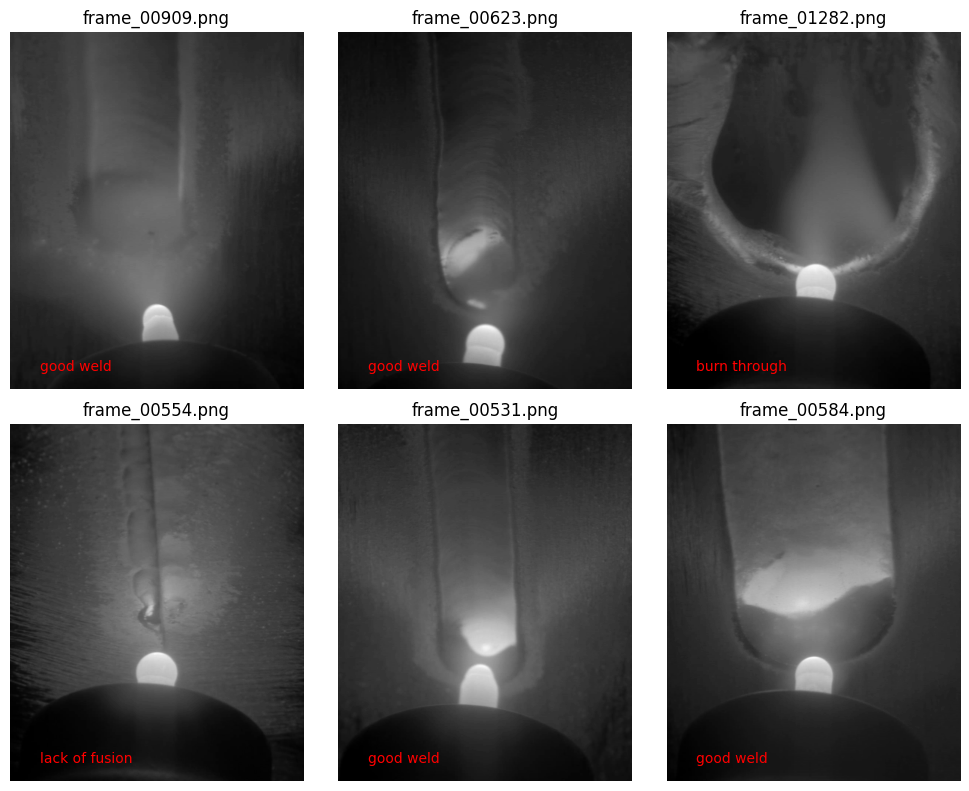

In [15]:
df_train_sample =df_train.sample(10,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 00 Good**

* Good Weld

filepath  defect defect_label
0        170906-114912-Al 2mm/frame_00815.png       0    good weld
1  170906-141809-Al 2mm-part1/frame_01119.png       0    good weld
2        170906-114912-Al 2mm/frame_00954.png       0    good weld
3        170906-120346-Al 2mm/frame_00795.png       0    good weld
4        170906-114912-Al 2mm/frame_00727.png       0    good weld
5        170905-114307-Al 2mm/frame_00655.png       0    good weld

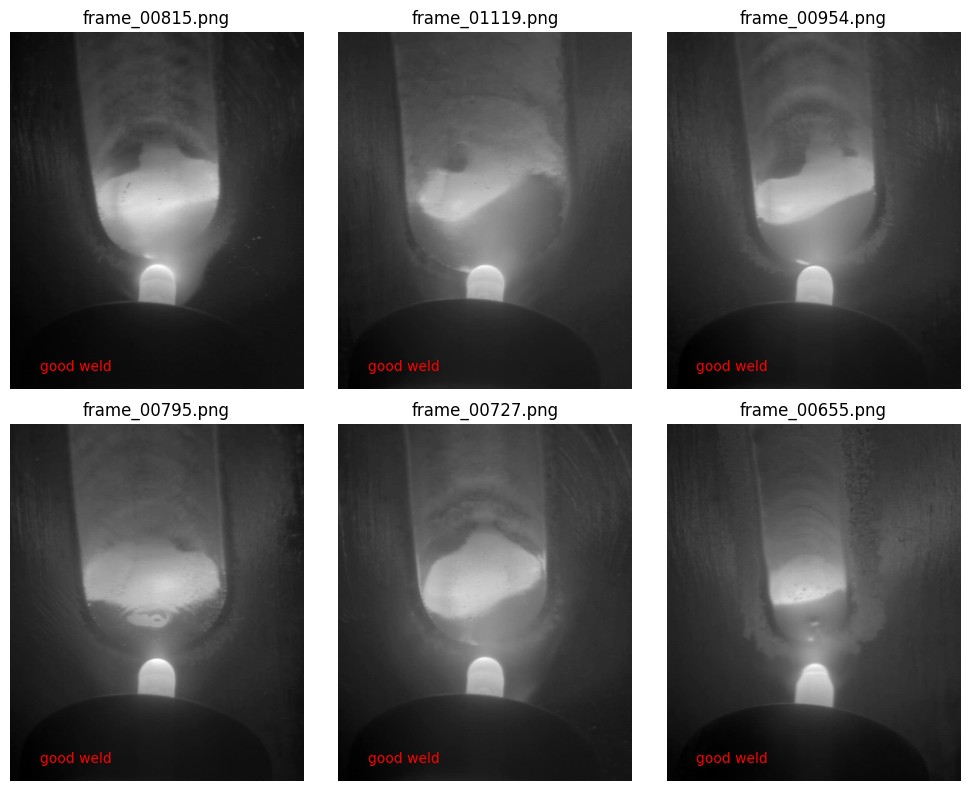

In [16]:
df_train_sample =df_train[df_train['defect']==0].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 01 Burn Through**

* Burn Through Defect

filepath  defect  defect_label
0  170906-144958-Al 2mm/frame_00914.png       1  burn through
1  170906-144958-Al 2mm/frame_01468.png       1  burn through
2  170906-144958-Al 2mm/frame_00325.png       1  burn through
3  170906-144958-Al 2mm/frame_00327.png       1  burn through
4  170906-144958-Al 2mm/frame_00348.png       1  burn through
5  170906-144958-Al 2mm/frame_00806.png       1  burn through

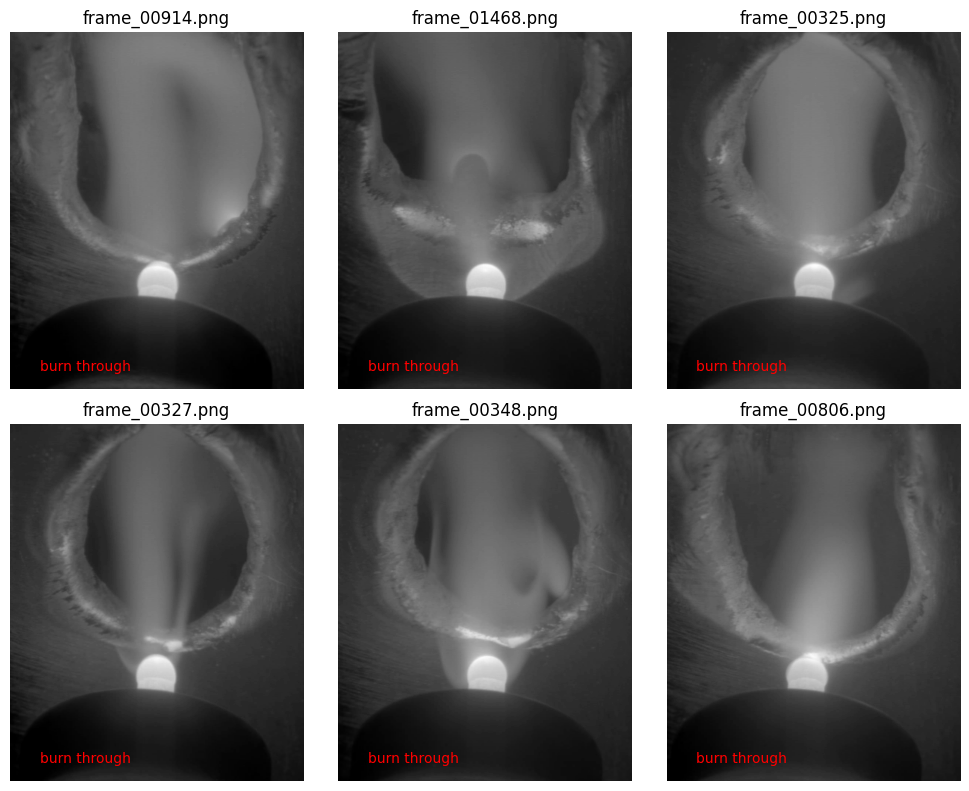

In [17]:
df_train_sample =df_train[df_train['defect']==1].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 02 Contamination**

* Weld Contamination

filepath  defect   defect_label
0        170904-115959-Al 2mm/frame_00183.png       2  contamination
1  170906-141809-Al 2mm-part2/frame_01644.png       2  contamination
2        170904-112347-Al 2mm/frame_01506.png       2  contamination
3  170913-143933-Al 2mm-part2/frame_00435.png       2  contamination
4        170904-112347-Al 2mm/frame_00394.png       2  contamination
5        170904-112347-Al 2mm/frame_00699.png       2  contamination

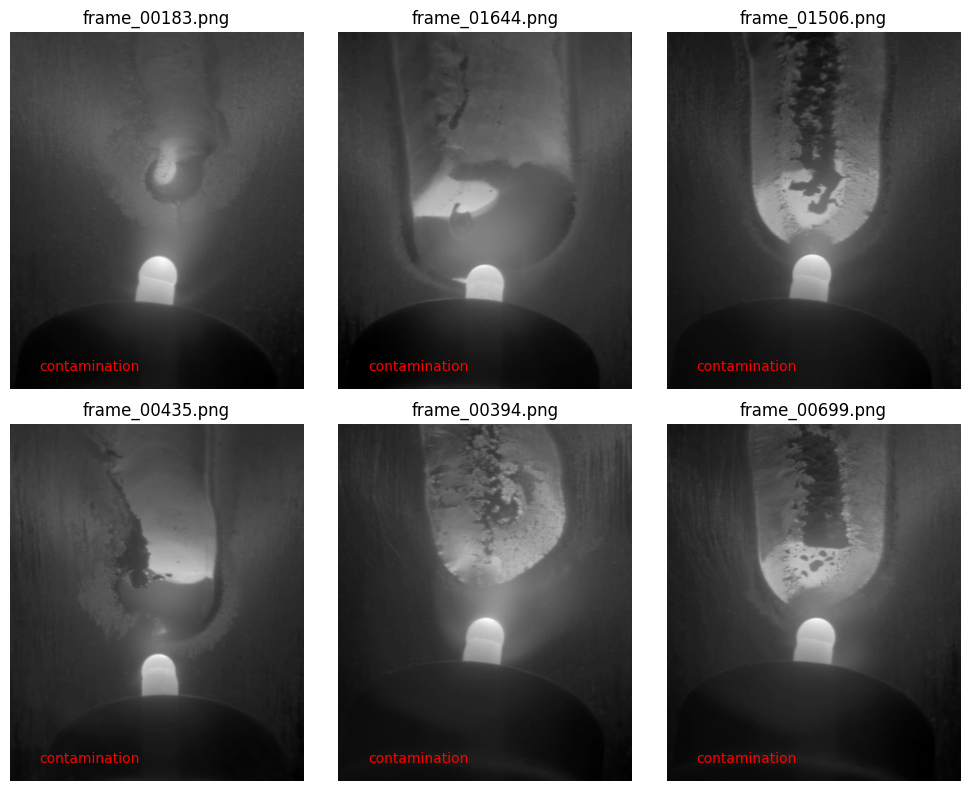

In [18]:
df_train_sample =df_train[df_train['defect']==2].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 03 Lack Of Fusion**

* Lack Of Fusion

filepath  defect    defect_label
0  170906-150801-Al 2mm/frame_00252.png       3  lack of fusion
1  170906-151353-Al 2mm/frame_00094.png       3  lack of fusion
2  170906-151353-Al 2mm/frame_01195.png       3  lack of fusion
3  170906-150010-Al 2mm/frame_01147.png       3  lack of fusion
4  170906-151353-Al 2mm/frame_00509.png       3  lack of fusion
5  170906-150801-Al 2mm/frame_01394.png       3  lack of fusion

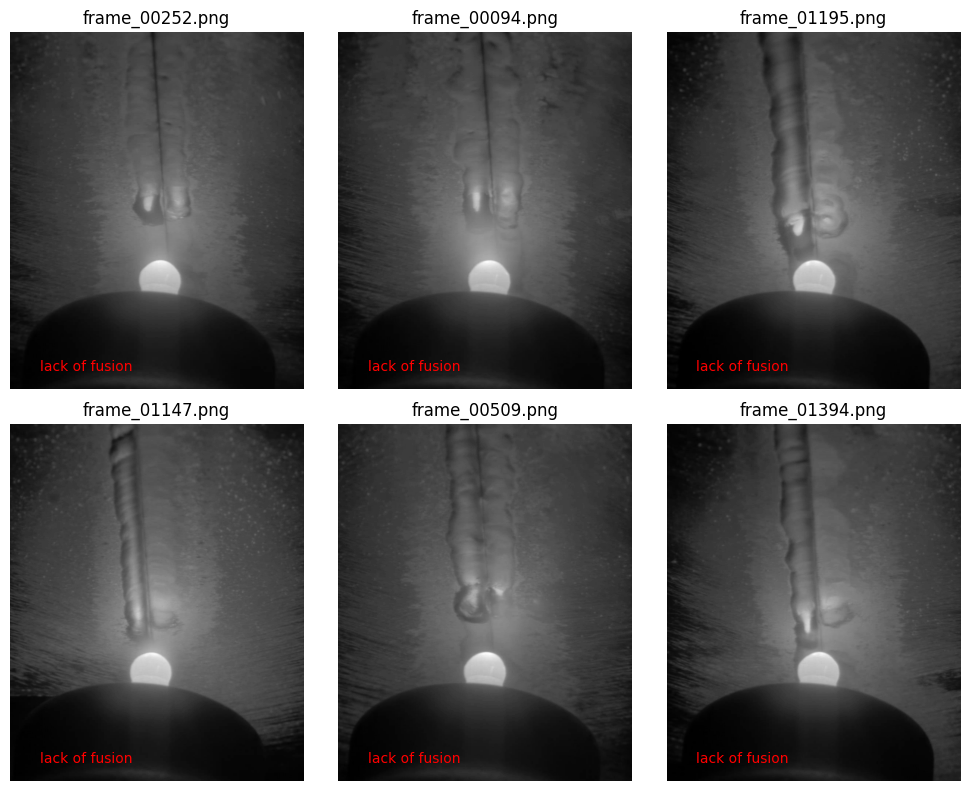

In [19]:
df_train_sample =df_train[df_train['defect']==3].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 04 Misalignment**

* Weld Misalignment

filepath  defect  defect_label
0        170904-155523-Al 2mm/frame_01460.png       4  misalignment
1        170913-140725-Al 2mm/frame_00737.png       4  misalignment
2        170913-140725-Al 2mm/frame_00266.png       4  misalignment
3        170913-140725-Al 2mm/frame_00342.png       4  misalignment
4  170904-145718-Al 2mm-part2/frame_00966.png       4  misalignment
5        170913-140725-Al 2mm/frame_00967.png       4  misalignment

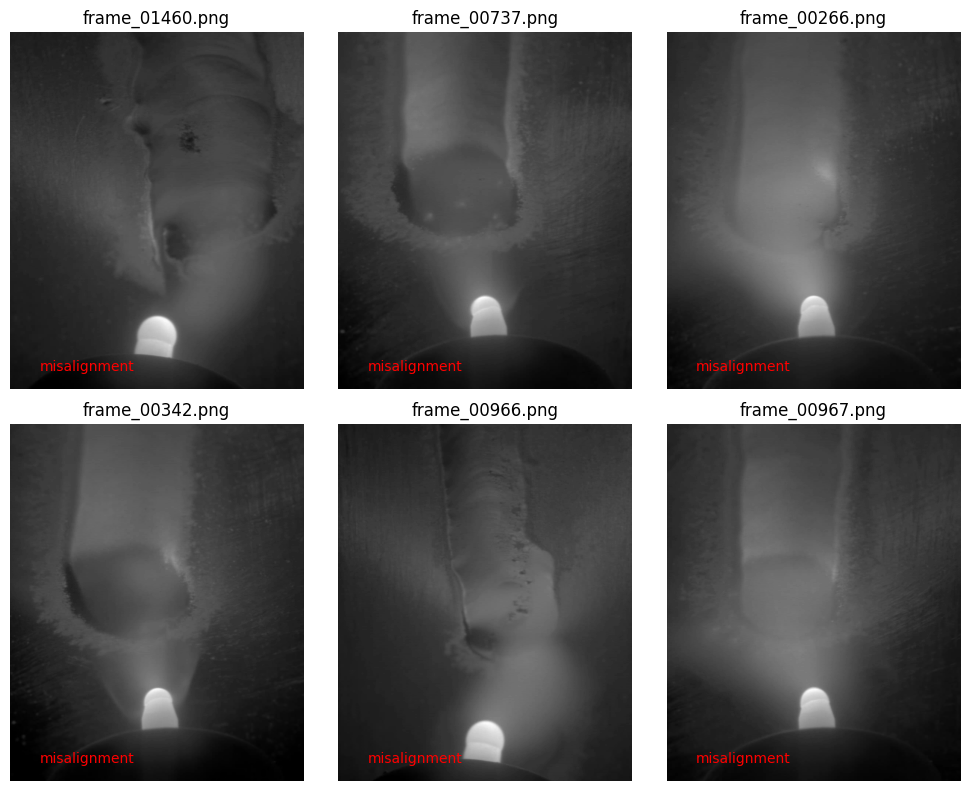

In [20]:
df_train_sample =df_train[df_train['defect']==4].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Type 05 Lack Of Penetration**

* Lack Of Penetration

filepath  defect         defect_label
0  170904-141232-Al 2mm-part1/frame_00266.png       5  lack of penetration
1  170904-141232-Al 2mm-part1/frame_00719.png       5  lack of penetration
2  170904-151845-Al 2mm-part1/frame_00781.png       5  lack of penetration
3  170904-141232-Al 2mm-part1/frame_00786.png       5  lack of penetration
4  170904-141232-Al 2mm-part1/frame_00463.png       5  lack of penetration
5  170906-153326-Al 2mm-part1/frame_00399.png       5  lack of penetration

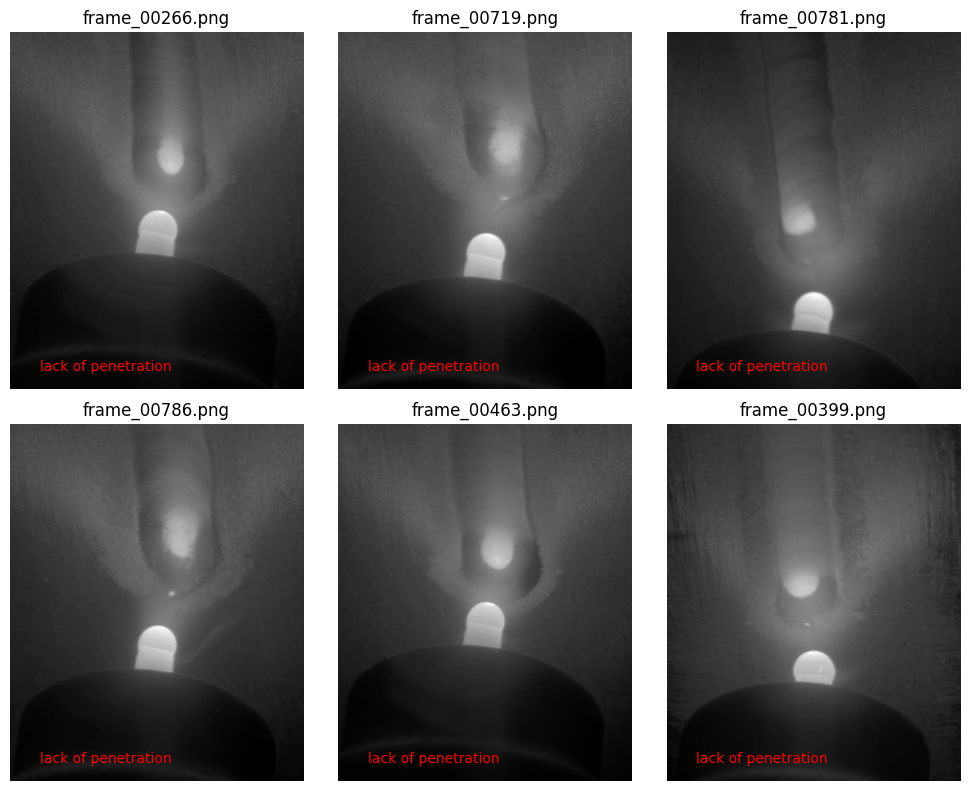

In [21]:
df_train_sample =df_train[df_train['defect']==5].sample(6,replace=False).reset_index(drop=True)
display(df_train_sample)

plt.figure(figsize=(10,8))
for i in range(6):
    filepath = df_train_sample.loc[i,'filepath']
    filepath = os.path.join(Folder_Input,'train',filepath)
    # print(filepath)
    file = plt.imread(filepath)
    file_shape = file.shape 

    plt.subplot(2,3,i+1)
    plt.imshow(file,cmap='gray',origin='lower')
    plt.title(label= df_train_sample.loc[i,'filepath'].split('/')[-1],loc='center')
    plt.text(s=df_train_sample.loc[i,'defect_label'].split('/')[-1],x=file_shape[1]*0.10,y=file_shape[0]*0.05,color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Data Processing**

In [22]:
df_train.head()

filepath  defect  defect_label
0  170906-113317-Al 2mm-part3/frame_00647.png       1  burn through
1  170906-113317-Al 2mm-part3/frame_00672.png       1  burn through
2  170906-113317-Al 2mm-part3/frame_00677.png       1  burn through
3  170906-113317-Al 2mm-part3/frame_00646.png       1  burn through
4  170906-113317-Al 2mm-part3/frame_00691.png       1  burn through

## **Add Actual Filepath**

In [10]:
df_train['Image_Path'] = df_train['filepath'].apply(lambda x: os.path.join(Folder_Train,x))

df_train.head()

filepath  defect  defect_label  \
0  170906-113317-Al 2mm-part3/frame_00647.png       1  burn through   
1  170906-113317-Al 2mm-part3/frame_00672.png       1  burn through   
2  170906-113317-Al 2mm-part3/frame_00677.png       1  burn through   
3  170906-113317-Al 2mm-part3/frame_00646.png       1  burn through   
4  170906-113317-Al 2mm-part3/frame_00691.png       1  burn through   

                                          Image_Path  
0  C:\Data Analytics Workspace\Datasets\01 Alumin...  
1  C:\Data Analytics Workspace\Datasets\01 Alumin...  
2  C:\Data Analytics Workspace\Datasets\01 Alumin...  
3  C:\Data Analytics Workspace\Datasets\01 Alumin...  
4  C:\Data Analytics Workspace\Datasets\01 Alumin...

## **Add Image Files**

In [10]:
def read_image_as_PIL(image_path):
    return PIL.Image.open(image_path,'r')

def read_image_size(image_path):
    return PIL.Image.open(image_path,'r').size

def read_image_as_array(image_path):
    return np.array(PIL.Image.open(image_path,'r'))/255.0

In [25]:
df_train02 = df_train.sample(3500)
df_train02['Image_PIL'] = df_train02['Image_Path'].apply(lambda x: read_image_as_PIL(x))
df_train02['Image_Size'] = df_train02['Image_Path'].apply(lambda x: read_image_size(x))

print(df_train02.shape)
print(df_train02.info())
df_train02.head()

(3500, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 22957 to 7015
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filepath      3500 non-null   object
 1   defect        3500 non-null   int64 
 2   defect_label  3500 non-null   object
 3   Image_Path    3500 non-null   object
 4   Image_PIL     3500 non-null   object
 5   Image_Size    3500 non-null   object
dtypes: int64(1), object(5)
memory usage: 191.4+ KB
None


filepath  defect    defect_label  \
22957        170906-150010-Al 2mm/frame_00257.png       3  lack of fusion   
23209        170906-150010-Al 2mm/frame_00288.png       3  lack of fusion   
19709        170906-120346-Al 2mm/frame_00303.png       0       good weld   
8156   170904-145718-Al 2mm-part2/frame_00971.png       4    misalignment   
15100        170905-115602-Al 2mm/frame_00856.png       0       good weld   

                                              Image_Path  \
22957  C:\Data Analytics Workspace\Datasets\01 Alumin...   
23209  C:\Data Analytics Workspace\Datasets\01 Alumin...   
19709  C:\Data Analytics Workspace\Datasets\01 Alumin...   
8156   C:\Data Analytics Workspace\Datasets\01 Alumin...   
15100  C:\Data Analytics Workspace\Datasets\01 Alumin...   

                                               Image_PIL  Image_Size  
22957  <PIL.PngImagePlugin.PngImageFile image mode=L ...  (800, 974)  
23209  <PIL.PngImagePlugin.PngImageFile image mode=L ...  (800, 974)  
19709  <PIL.PngImagePlugin.PngImageFile image mode=L ...  (800, 974)  
8156   <PIL.PngImagePlugin.PngImageFile image mode=L ...  (800, 974)  
15100  <PIL.PngImagePlugin.PngImageFile image mode=L ...  (800, 974)

In [26]:
df_train02['Image_Size'].unique()   

array([(800, 974)], dtype=object)

In [27]:
# df_train02['Image_Array'] = df_train02['Image_Path'].apply(lambda x: read_image_as_array(x))

## **Split Training Data**

In [28]:
# from sklearn.model_selection import train_test_split

# train,val = train_test_split(df_train02,test_size=0.2)

# print(train.shape,val.shape)

## **Create Generator**

In [29]:
df_train02['Image_Size'].unique()

array([(800, 974)], dtype=object)

In [30]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define your data directory
# # Folder_Train = "/path/to/your/image_folder"

# # Create an image data generator
# image_data_generator = ImageDataGenerator(
#     rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
#     validation_split=0.2,  # Split data into train and validation sets
# )

# # Load images from the directory
# train_dataset = image_data_generator.flow_from_directory(
#     Folder_Train,
#     target_size=(800,974),  # Resize images to a specific size
#     batch_size=32,
#     class_mode="categorical",  # Set to "binary" for binary classification
#     subset="training",  # Use the training subset
#     shuffle=True,
# )

# validation_dataset = image_data_generator.flow_from_directory(
#     Folder_Train,
#     target_size=(800,974),
#     batch_size=32,
#     class_mode="categorical",
#     subset="validation",  # Use the validation subset
#     shuffle=False,  # No need to shuffle validation data
# )

In [31]:
# print(train_dataset)
# print(validation_dataset)

## **Create Custom Data Generator**

In [11]:
df_train.head()

filepath  defect  defect_label  \
0  170906-113317-Al 2mm-part3/frame_00647.png       1  burn through   
1  170906-113317-Al 2mm-part3/frame_00672.png       1  burn through   
2  170906-113317-Al 2mm-part3/frame_00677.png       1  burn through   
3  170906-113317-Al 2mm-part3/frame_00646.png       1  burn through   
4  170906-113317-Al 2mm-part3/frame_00691.png       1  burn through   

                                          Image_Path  
0  C:\Data Analytics Workspace\Datasets\01 Alumin...  
1  C:\Data Analytics Workspace\Datasets\01 Alumin...  
2  C:\Data Analytics Workspace\Datasets\01 Alumin...  
3  C:\Data Analytics Workspace\Datasets\01 Alumin...  
4  C:\Data Analytics Workspace\Datasets\01 Alumin...

In [12]:
def load_and_preprocess_image(file_path, label):
    # Read image from file path and preprocess
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize(image, (800,974))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

In [13]:
# Create a dataset from dataframe
image_paths = df_train["Image_Path"].values
labels = df_train["defect"].values

In [14]:
print(image_paths)

['C:\\Data Analytics Workspace\\Datasets\\01 Aluminium TIG Welding/train\\170906-113317-Al 2mm-part3/frame_00647.png'
 'C:\\Data Analytics Workspace\\Datasets\\01 Aluminium TIG Welding/train\\170906-113317-Al 2mm-part3/frame_00672.png'
 'C:\\Data Analytics Workspace\\Datasets\\01 Aluminium TIG Welding/train\\170906-113317-Al 2mm-part3/frame_00677.png'
 ...
 'C:\\Data Analytics Workspace\\Datasets\\01 Aluminium TIG Welding/train\\170906-150801-Al 2mm/frame_00346.png'
 'C:\\Data Analytics Workspace\\Datasets\\01 Aluminium TIG Welding/train\\170906-150801-Al 2mm/frame_00116.png'
 'C:\\Data Analytics Workspace\\Datasets\\01 Aluminium TIG Welding/train\\170906-150801-Al 2mm/frame_00319.png']


In [17]:
print(labels)
print(type(labels))
print(labels.shape)

[1 1 1 ... 3 3 3]
<class 'numpy.ndarray'>
(26666,)


In [24]:
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
dataset = dataset.map(load_and_preprocess_image)
dataset = dataset.shuffle(buffer_size=len(df_train))  # Shuffle the data
dataset = dataset.batch(batch_size=32)  # Set your desired batch size

print(dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 800, 974, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [28]:
dataset.take(5)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 800, 974, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [29]:
# Split into training and validation datasets
val_size = int(0.2 * len(image_paths))
train_dataset = dataset.skip(val_size)
val_dataset = dataset.take(val_size)

In [30]:
print(train_dataset)
print(val_dataset)

<_SkipDataset element_spec=(TensorSpec(shape=(None, 800, 974, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 800, 974, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
# for image, label in train_dataset.take(1):
#     # Process the image and label as needed
#     print(f"Label: {label}, Image shape: {image.shape}")

# **Model Development**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Activation,Normalization,BatchNormalization,Conv2D,MaxPooling2D,Flatten,GlobalAveragePooling2D

## **Create Model**

In [35]:
Model = Sequential()

Model.add(InputLayer(input_shape = (800,974,1)))

Model.add(Conv2D(filters=16, kernel_size=(3,3), activation ='relu', padding ='same'))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(filters=32, kernel_size=(3,3), activation ='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(rate=0.25))

Model.add(Flatten())
Model.add(Dense(units=64, activation ='relu'))
Model.add(Dense(1, activation ='softmax'))
Model.summary()

Model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[1541056,64] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:StatelessRandomUniformV2] name: 

## **Def Callbacks**

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

Model_ES = EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.001,mode='auto')
Model_CP = ModelCheckpoint(filepath='best_model.keras', monitor='val_accuracy',save_best_only=True,
                           save_freq='epoch', verbose=1, mode='auto')
Model_CB = [Model_ES, Model_CP]

## **Fit Model**

In [34]:
Model_History = Model.fit(train_dataset, epochs=1, validation_data=val_dataset, callbacks=Model_CB)
# Model.save('best_model.keras')

c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


ResourceExhaustedError: Graph execution error:

Detected at node resize/ResizeBilinear defined at (most recent call last):
<stack traces unavailable>
OOM when allocating tensor with shape[1,800,974,1] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node resize/ResizeBilinear}}]]
	 [[IteratorGetNext]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_1684]

## **Visualize Model**

In [36]:
from IPython.display import Image

keras.utils.plot_model(Model, to_file='CNN2D_Model.png', show_shapes=True)
Image('CNN2D_Model.png')

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

## **Model Evaluation**

In [37]:
Model_History.history.keys()

NameError: name 'Model_History' is not defined

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,3))

axs[0].plot(Model_History.history['accuracy'],label='Training Accuracy')
axs[0].plot(Model_History.history['val_accuracy'],label='Validation Accuracy')
axs[0].set_title('Training Vs Validation Accuracy')
axs[0].legend()
axs[0].grid()

axs[1].plot(Model_History.history['loss'],label='Training Loss')
axs[1].plot(Model_History.history['val_loss'],label='Validation Accuracy')
axs[1].set_title('Training Vs Validation Loss')
axs[1].legend()
axs[1].grid()

plt.show()

## **Model Testing**

In [ ]:
from keras.models import load_model
Model_Copy = load_model('best_model.h5')

Model_Test_Data = Model_Copy.evaluate(Test_Data)
print("Test Loss: ", Model_Test_Data[0])
print("Test Accuracy: ", Model_Test_Data[1])

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

# Test_Image_Path = "Input Data\\Test\\Healthy\\Not Cancer  (1).jpeg"
Test_Image_Path = 'Input Data\Test\Brain Tumor\Cancer (5).jpg'
Test_Image = load_img(Test_Image_Path, target_size=(224, 224))

Test_Image_Array = img_to_array(Test_Image)/255
print(Test_Image_Array.shape)
plt.imshow(Test_Image_Array)
plt.show()

# Reshape To Include Batch Size = 1 (Only 1 Test Image)
# Method 01
# Test_Image_Array = Test_Image_Array.reshape(1, Test_Image_Array.shape[0],Test_Image_Array.shape[1],Test_Image_Array.shape[2])
# Method 02
Test_Image_Array = np.expand_dims(Test_Image_Array, axis=0)
print(Test_Image_Array.shape)

# Model Prediction
Test_Image_Predict = Model_Copy.predict(Test_Image_Array)[0][0]
Test_Image_Predict = int(round(Test_Image_Predict,0))
print('Test Image Predicted Class: ',Test_Image_Predict)